In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
train = pd.read_csv('../input/snu-2021-1-ds-project-2/train.csv')
test = pd.read_csv('../input/snu-2021-1-ds-project-2/test.csv')
test_org = test.copy()

In [71]:
test_org.shape

(841653, 18)

In [3]:
train.head()

,id,time,label,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16
0,0,0.00,0.0,-50.85,-1.95,-41.82,1.30,-4.07,-28.73,-13.49,-3.25,55139.95,50669.50,9626.26,9762.62,24544.02,21420.68,7650.61,6928.42
1,1,0.01,0.0,-49.40,-5.53,-42.78,0.49,3.58,-34.55,-9.59,5.37,54395.77,50046.91,9433.20,9591.21,24137.13,20930.33,7498.79,6800.66
2,2,0.01,0.0,-40.04,-16.09,-27.59,0.00,-7.16,-42.14,-12.52,-5.86,53960.02,49299.30,9324.40,9449.81,23628.90,20504.94,7369.67,6697.47
3,3,0.03,0.0,-47.14,-10.57,-32.28,4.40,-11.22,-37.94,-7.16,-1.14,53047.71,48907.00,9170.64,9305.58,23101.66,20101.42,7285.13,6578.52
4,4,0.04,0.0,-33.58,-20.79,-33.25,6.03,3.42,-34.22,-14.46,8.31,52700.28,48330.96,9073.64,9163.47,22689.54,19694.07,7156.74,6468.32


# DATA PREPROCESSING

# downsampling (1/100)

먼저 전체 데이터 숫자를 줄이기 위해서 100개 단위로 평균을 내어 row 숫자를 1/100으로 나눴습니다. 이제 1초 = 1row

In [4]:
def get_average(s, n):
  ''' time series s를 n개 단위로 묶어서 평균냄'''
  avr = []
  for i in range( (len(s) + n-1)//n ):
    tmp = s[i*n:(i+1)*n]
    avr.append( sum(tmp) / len(tmp) )
  return avr

down sampling한 s1~s16은 train_ds DataFrame에 저장합니다.

In [5]:
train_ds = pd.DataFrame()

average_n = 100 # 몇 개씩 평균 낼 것인지
sensor = ['s'+ str(i) for i in list(range(1,17,1))] # s1~s16
for i in sensor:
  train_ds[i] = get_average(train[i], average_n)

In [6]:
# label도 1/100개로 줄임
label_average = []
for i in range( (len(train['label']) + average_n-1) // average_n ):
  tmp = train['label'][i*average_n:(i+1)*average_n]
  if tmp[tmp.index[0]] == tmp[tmp.index[-1]]:
    label_average.append(tmp[tmp.index[0]])
  else:
    label_average.append(tmp[i*average_n + len(tmp)/2]) # label이 경계에 걸쳐 있는 경우에는 그중에 더 많은 값으로 넣어주기
train_ds['label'] = label_average
train_ds['time'] = list(range(len(train_ds)))

In [7]:
print(len(train_ds)) #총 33667초
train_ds.head()

33667


,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,label,time
0,-43.5812,3.2326,-31.6914,6.9871,0.4040,-30.4201,-9.4843,0.6295,29396.3428,27788.7341,6396.1913,6494.9975,13473.9833,11975.7149,4867.6434,4408.8633,0.0,0
1,-3.6138,124.5019,-25.1623,11.7361,13.6423,-7.9299,-2.7228,6.8779,5663.3367,6900.4790,3304.5153,3393.4591,5145.7719,4840.8170,2362.8634,2136.0863,0.0,1
2,166.1814,469.3404,-4.7519,36.6923,83.0455,109.9075,20.1221,35.1073,2111.2245,2784.4936,2055.9942,2119.5522,2809.5599,2767.0945,1412.4664,1271.5339,0.0,2
3,461.2603,1050.4621,39.4680,86.1671,252.2166,410.9374,65.8834,87.6538,1258.0793,1682.2406,1473.8394,1514.9736,1911.0651,1942.8372,979.1155,878.0634,0.0,3
4,763.8031,1625.5939,102.6777,155.1491,499.1618,831.9782,128.5454,164.1638,944.3740,1255.0256,1174.4355,1201.1143,1504.7258,1554.8407,760.6016,679.6028,0.0,4


아래가 전처리 후 그래프입니다. 선이 깔끔해졌죠?

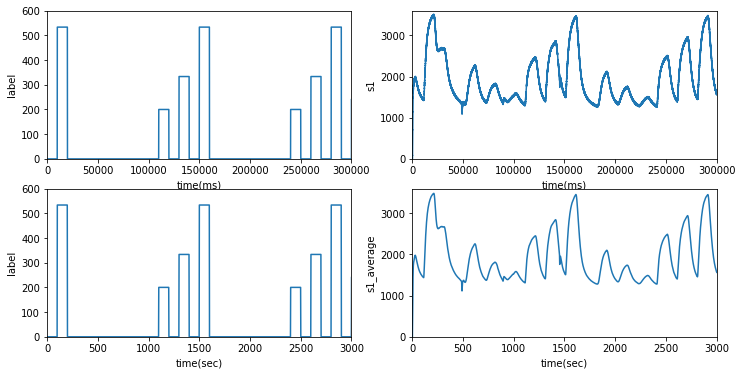

In [8]:
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.plot(train.id, train.label)
plt.xlabel('time(ms)')
plt.ylabel('label')
plt.axis([0,300000, 0,600])

plt.subplot(222)
plt.plot(train.id, train.s1)
plt.xlabel('time(ms)')
plt.ylabel('s1')
plt.axis([0,300000, 0, 3600])

plt.subplot(223)
plt.plot(train_ds['time'], train_ds['label'])
plt.xlabel('time(sec)')
plt.ylabel('label')
plt.axis([0,3000, 0,600])

plt.subplot(224)
plt.plot(train_ds['time'], train_ds['s1'])
plt.xlabel('time(sec)')
plt.ylabel('s1_average')
plt.axis([0,3000, 0,3600])

plt.show()

In [9]:
plt.rcParams["figure.figsize"] = (18,5) 
plot_color = ['#1f77b4', '#ff7f0e', '#bcbd22']
def plot_time(df, time=(0, 100), columns='all', title='', text=None):
    df_time = df[(df['time']>=time[0]) & (df['time']<time[1])]
    column_list = df.columns if columns=='all' else columns

    if text:
      plt.figure(figsize=(22,4))

    i = 0
    for col in column_list:
        if col !='time':
            plt.plot('time', col, data=df_time, color=plot_color[i])
            i+=1

    if text:
      j = 0
      while(text[j][0] < time[0]):
        j += 1
      k = 0
      while(k < len(text) and text[k][0] < time[1]):
        k += 1
      for i, _ in enumerate(text[j:k+1]):
        interval, height = _
        plt.text(x = (text[i+j][0]+text[i+j-1][0])/2,
                y = height,
                s = str(height), 
                color = 'red', horizontalalignment='center')
        
        plt.text(x = (text[i+j][0]+text[i+j-1][0])/2,
                y = 100,
                s = str( text[i+j][0]-text[i+j-1][0] ), 
                color = 'green', horizontalalignment='center')

    plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
    plt.title(title, fontsize=25)
    plt.show()

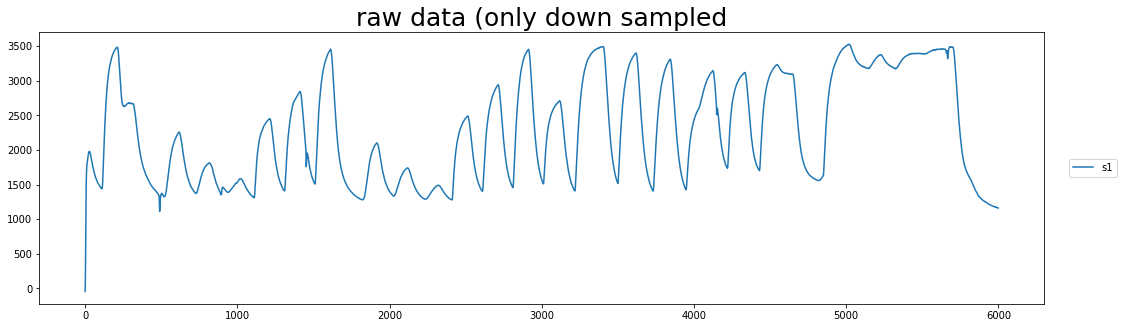

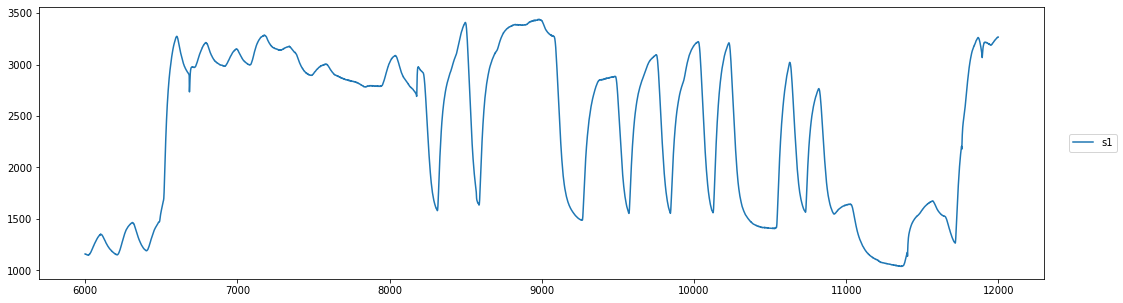

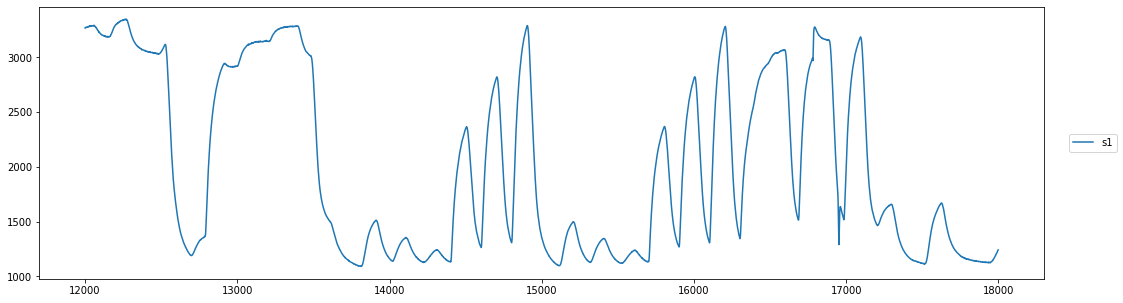

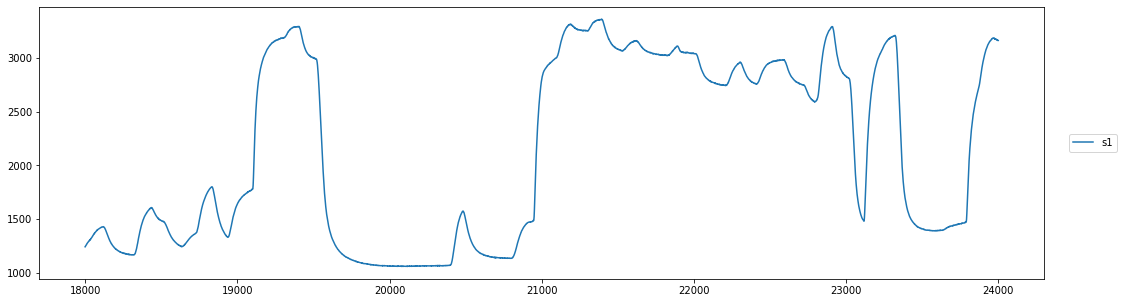

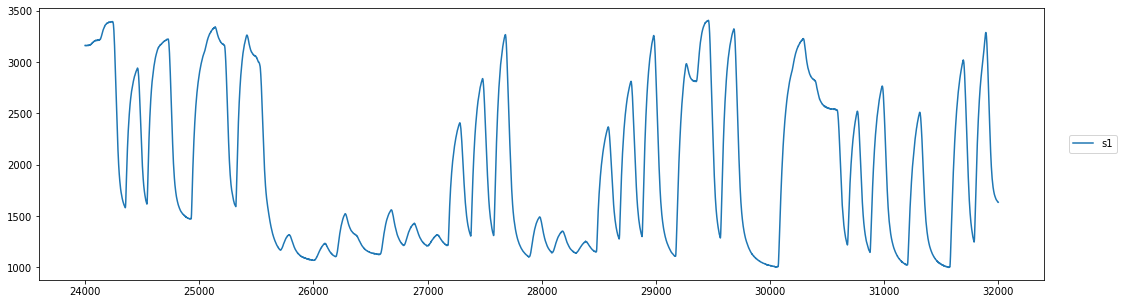

In [10]:
plot_time(train_ds, time=(0, 6000), columns=['s1', ], title='raw data (only down sampled')
plot_time(train_ds, time=(6000, 12000), columns=['s1', ])
plot_time(train_ds, time=(12000, 18000), columns=['s1', ])
plot_time(train_ds, time=(18000, 24000), columns=['s1', ])
plot_time(train_ds, time=(24000, 32000), columns=['s1', ])

# moving_average & minmax scaler & 시차보정

들쑥날쑥한 걸 줄이기 위해 moving_average(100초씩)를 취해줍니다.

In [11]:
moving_average = 100

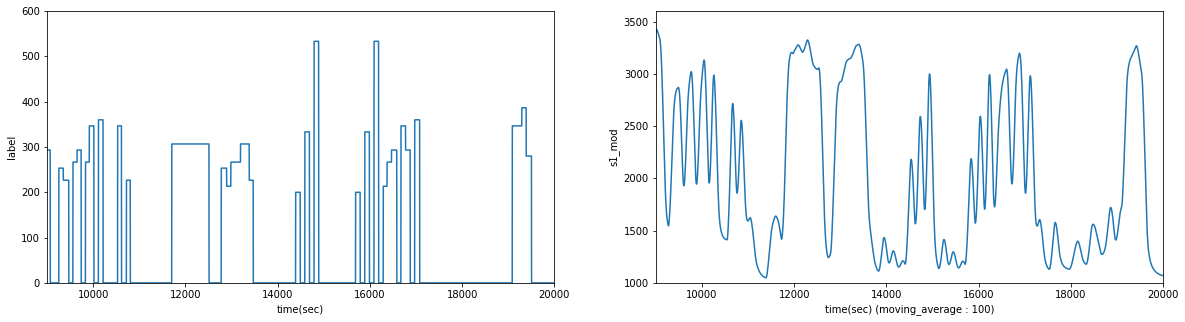

In [12]:
plt.figure(figsize=(20,5))
plt_range = [9000, 20000] # 그래프에서 보고 싶은 구간 설정

plt.subplot(121)
plt.plot(train_ds['time'], train_ds['label'])
plt.xlabel('time(sec)')
plt.ylabel('label')
plt.axis([*plt_range, 0,600])

plt.subplot(122)
s1_mod = train_ds['s1'].rolling(window=moving_average).mean()
plt.plot(s1_mod)
plt.xlabel('time(sec) (moving_average : %d)' %(moving_average))
plt.ylabel('s1_mod')
plt.axis([*plt_range, 1000,3600])

plt.show()

s1~s16에 대해서 moving average를 하고, minmax를 취해서 label이랑 비슷하게 만듭니다. 

여기부터는 train_ds에 's#_mod' 라는 이름의 컬럼으로 따로 저장할게요.



In [13]:
label_max = max(train_ds['label']) # train data에서 label의 최댓값. 
def minmax_scale(x, first=True):
    _max = x.max()
    if first:
      _min = x[20:].min() # 맨 처음 센서를 켰을 때 아주 낮은 값에서부터 시작하기 때문에 초반 몇개는 제외함 (s1의 경우 원래는 값이 1000이상인데 첫번째 값이 -40임)
    else: # 이거는 test set용. test set은 켜져있는 상태에서 측정한거니까.
      _min = x.min()
    _denom = _max - _min
    temp = ((x - _min) / _denom) * label_max
    return [max(i,0) for i in temp]

In [14]:
# moving_average && minmax_scale
for i in sensor:
  temp = train_ds[i].rolling(window=moving_average).mean()
  train_ds[i+'_mod'] = minmax_scale(temp)

여기까지 하고 확인해보면 이렇게 그려집니다.

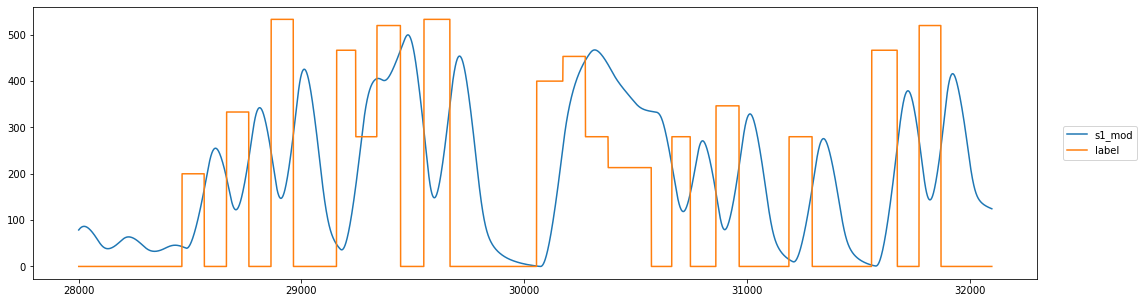

In [15]:
plot_time(train_ds, time=(28000,32100), columns=['s1_mod', 'label'])

여기서 대략 눈대중으로 100초 정도를 앞당겨주면 시간차가 거의 없어지는 것 같고,

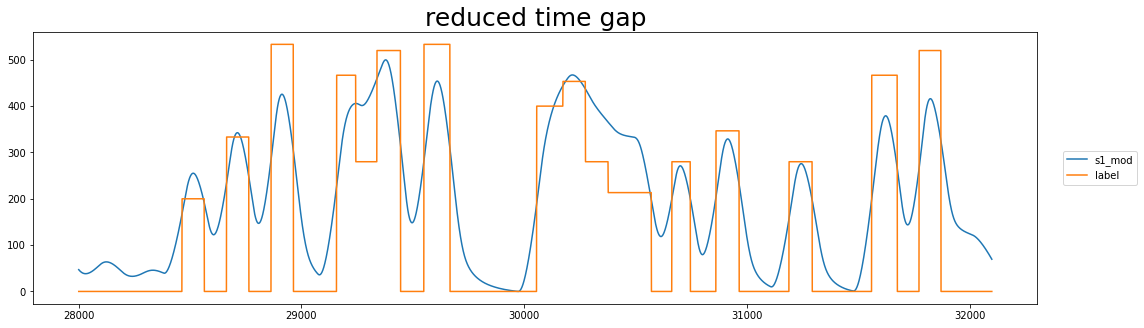

In [16]:
time_gap = -100

train_ds['s1_mod'] = train_ds['s1_mod'].shift(time_gap)
plot_time(train_ds, time=(28000,32100), columns=['s1_mod', 'label'], title='reduced time gap')

# block 맞추기

s1의 경우에 200~250 이하의 (임의의) 값을 기준으로 다 0으로 내려주면 블록이랑 거의 겹쳐집니다.
이걸 s1_mod2에 넣겠습니다.

In [17]:
cut_off = 243
train_ds['s1_mod2'] = [i if i>=cut_off else 0 for i in train_ds['s1_mod'] ]

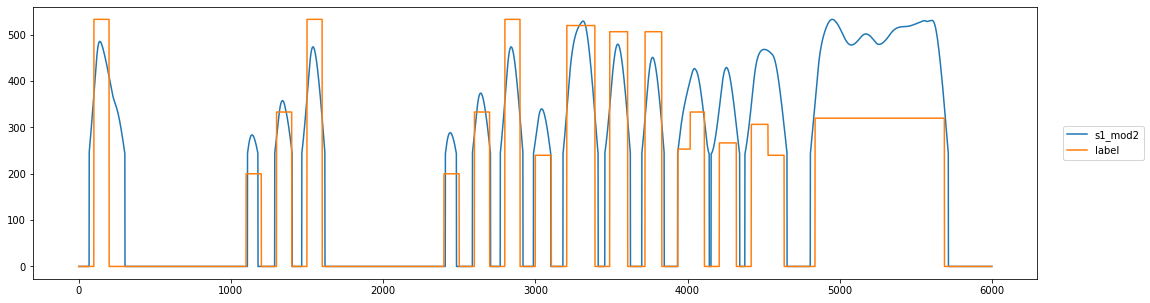

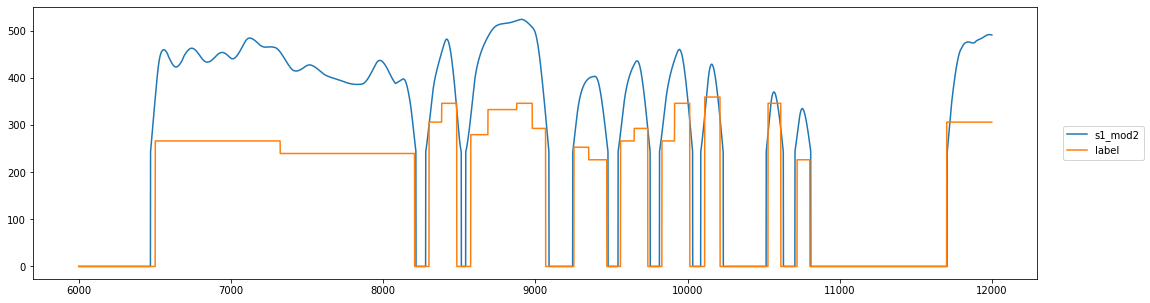

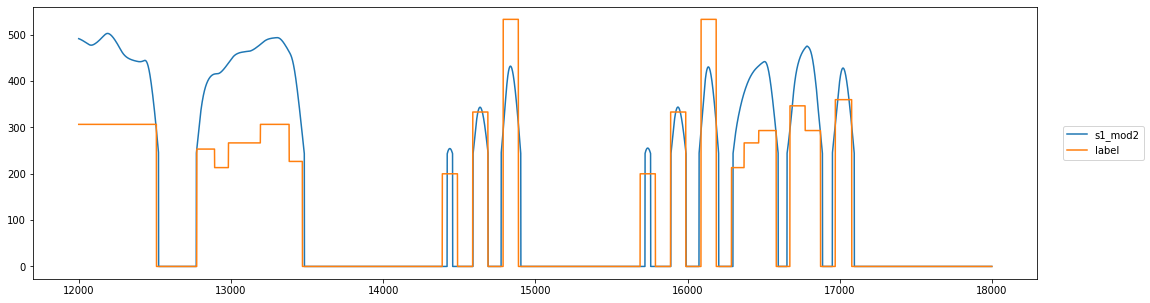

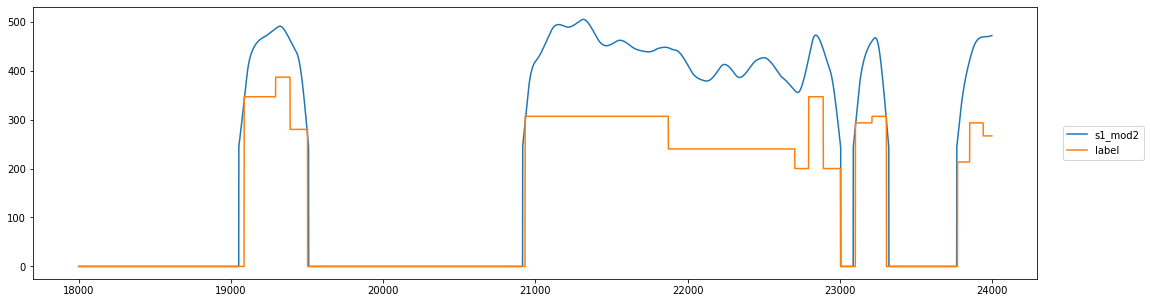

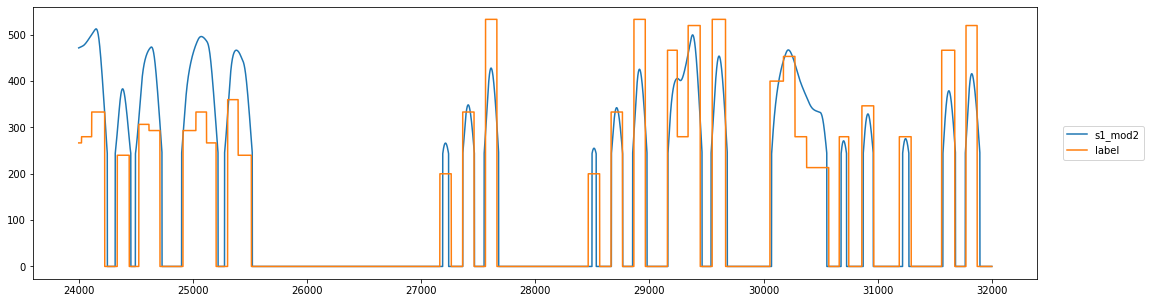

In [18]:
plot_time(train_ds, time=(0, 6000), columns=['s1_mod2','label' ])
plot_time(train_ds, time=(6000, 12000), columns=['s1_mod2','label',])
plot_time(train_ds, time=(12000, 18000), columns=['s1_mod2','label',])
plot_time(train_ds, time=(18000, 24000), columns=['s1_mod2','label',])
plot_time(train_ds, time=(24000, 32000), columns=['s1_mod2','label',])

그치만 애매하게 안 맞는 부분들이 많습니다. 왼쪽은 너무 많이 깎여나갔고, 오른쪽은 label=0인 부분이 포함됐죠. 이걸 보정하기 위해 극대 극소값을 찾은 다음에, 극대값의 좌우로 일정구간만큼을 값을 보전해주고, 극소값 좌우로 일정구간은 무조건 0으로 내리겠습니다.

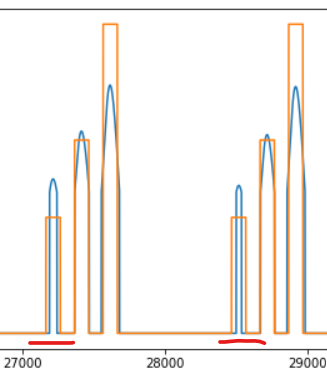 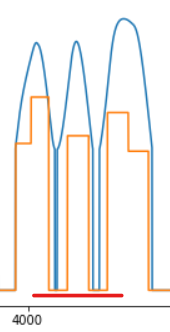

In [19]:
# block 시작, 끝 찾기
def find_block(data, DATA = train_ds, index='time'):
  zero_time = DATA[index][DATA[data] == 0].tolist()
  nonzero_time = DATA[index][DATA[data] != 0].tolist()

  start_block=[nonzero_time[0]]
  for i in range(1, len(nonzero_time)):
      if nonzero_time[i-1] + 1 != nonzero_time[i]:
          start_block.append(nonzero_time[i])

  end_block=[]
  for i in range(len(nonzero_time) - 1):
      if nonzero_time[i] + 1 != nonzero_time[i + 1]:
          end_block.append(nonzero_time[i])        
  end_block.append(nonzero_time[-1])

  return start_block , end_block

In [20]:
start_block ,end_block = find_block('s1_mod2')
len(start_block) # block의 개수

57

In [21]:
# 근데 생각해보니까 극대극소값을 찾는 거보다 그냥 cut_off해서 생긴 블럭 내, 블럭 간의 중간지점을 기준으로 해줘도 될 거 같아서 이렇게 합니다.

# 극소(짭)에서 좌우로 zero_length만큼은 0으로 내려줍니다.
zero_length_left = 40  
zero_length_right = 55
train_ds['s1_mod3'] = train_ds['s1_mod2']
for i in range(len(start_block)-1):
  mid = (end_block[i] + start_block[i+1]) // 2
  for j in range(mid - zero_length_left, mid + zero_length_right+1):
        train_ds.at[j, 's1_mod3'] = 0

In [22]:
# 위에서 수정됐으니까 block 구간 다시 구하기
start_block ,end_block = find_block('s1_mod3')

In [23]:
# 극대(짭)에서 좌우로 nonzero_length만큼은 복원시켜줍니다.
nonzero_length_left = 48
nonzero_length_right = 48
for i in range(len(start_block)):
  mid = (start_block[i] + end_block[i]) // 2
  for j in range(mid - nonzero_length_left, mid + nonzero_length_right+1):
    train_ds.at[j, 's1_mod3'] = train_ds.at[j, 's1_mod']

잘 됐는지 확인해봅시다. 파란색만큼 삐져나오거나 들어가있던 거를 보정해줬습니다. 잘됐죠?

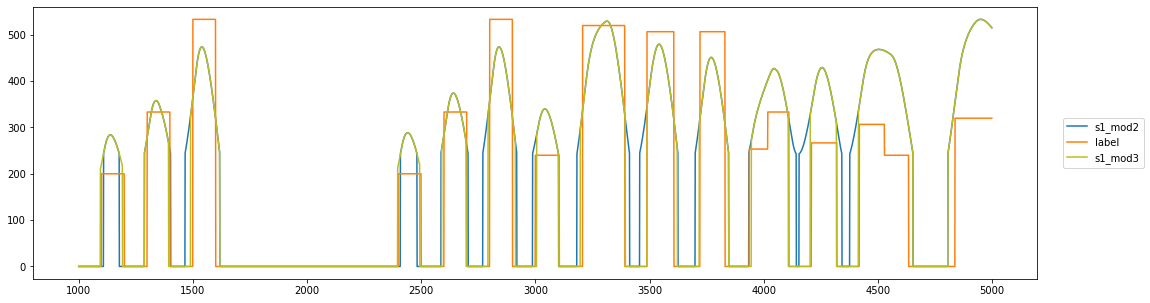

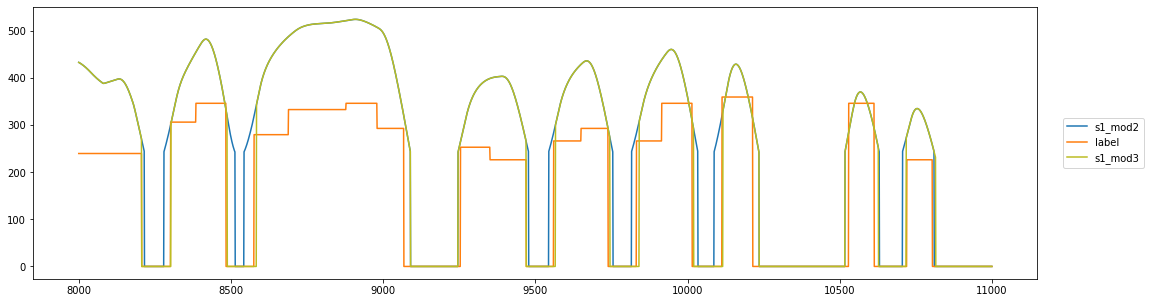

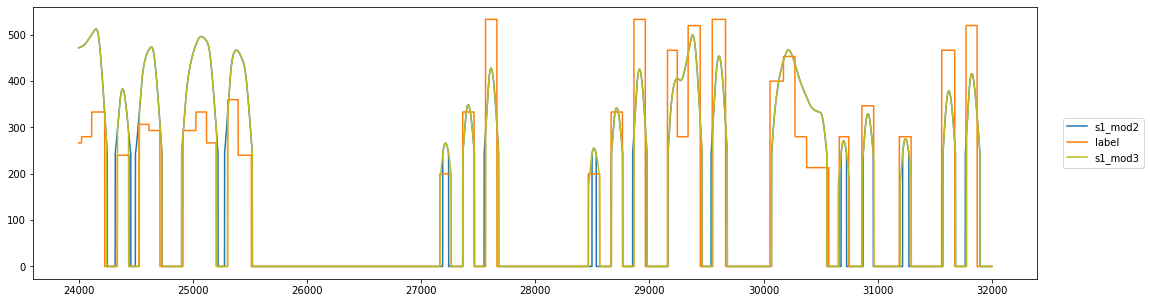

In [24]:
# 잘 됐는지 확인
plot_time(train_ds, time=(1000, 5000), columns=['s1_mod2','label', 's1_mod3'])
plot_time(train_ds, time=(8000, 11000), columns=['s1_mod2','label', 's1_mod3'])
plot_time(train_ds, time=(24000, 32000), columns=['s1_mod2','label','s1_mod3'])

# long block trimming

In [25]:
long_block_size = 200
trimming = 0.65

In [26]:
def long_block_trimming(result, data, long_block_size, trimming, DATA = train_ds):
  start_block ,end_block = find_block(data, DATA = DATA)

  block_length = []
  for i in range(len(start_block)):
      distance = end_block[i] - start_block[i]
      block_length.append(distance)
  print("# of blocks: ", len(block_length))
  print("start_block: ", start_block)
  print("end_block ", end_block)
  print("block_length: ", block_length)

  start_block_long = [start_block[i] for i, blength in enumerate(block_length) if blength > long_block_size]
  end_block_long = [end_block[i] for i, blength in enumerate(block_length) if blength > long_block_size]
  
  DATA[result] = DATA[data]
  for i in range(len(start_block_long)):
      start = start_block_long[i]
      end = end_block_long[i]
      for j in range(start, end + 1):
          DATA.at[j, result] = DATA.at[j, data] * trimming

In [27]:
long_block_trimming('s1_mod4', 's1_mod3', long_block_size, trimming)

# of blocks:  57
start_block:  [69, 1095, 1288, 1490, 2397, 2590, 2793, 3006, 3197, 3490, 3718, 3946, 4204, 4415, 4807, 6472, 8303, 8584, 9246, 9566, 9841, 10116, 10517, 10718, 11706, 12773, 14390, 14591, 14788, 15691, 15891, 16089, 16307, 16680, 16975, 19052, 20917, 23103, 23769, 24340, 24532, 24902, 25305, 27166, 27365, 27565, 28467, 28667, 28865, 29162, 29556, 30070, 30654, 30868, 31197, 31571, 31779]
end_block  [303, 1191, 1393, 1617, 2493, 2696, 2912, 3102, 3393, 3621, 3846, 4107, 4318, 4653, 5713, 8206, 8487, 9089, 9469, 9744, 10019, 10234, 10626, 10814, 12524, 13482, 14486, 14689, 14904, 15787, 15990, 16204, 16583, 16878, 17095, 19510, 23006, 23322, 24244, 24436, 24729, 25208, 25520, 27262, 27466, 27678, 28563, 28765, 28978, 29459, 29681, 30553, 30750, 30964, 31293, 31680, 31894]
block_length:  [234, 96, 105, 127, 96, 106, 119, 96, 196, 131, 128, 161, 114, 238, 906, 1734, 184, 505, 223, 178, 178, 118, 109, 96, 818, 709, 96, 98, 116, 96, 99, 115, 276, 198, 120, 458, 2089, 219, 47

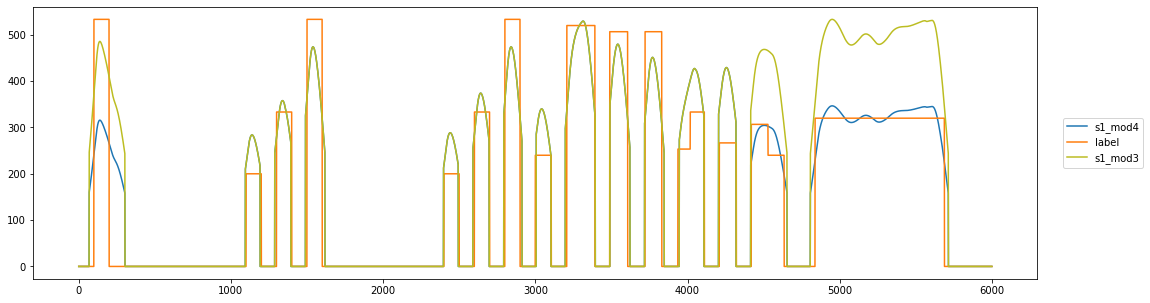

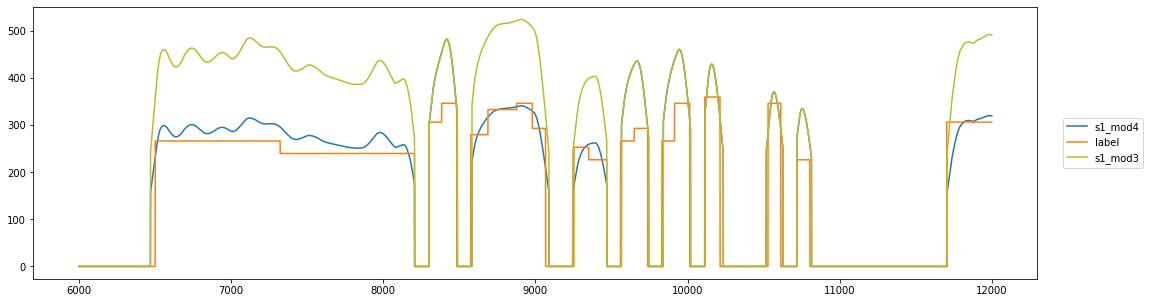

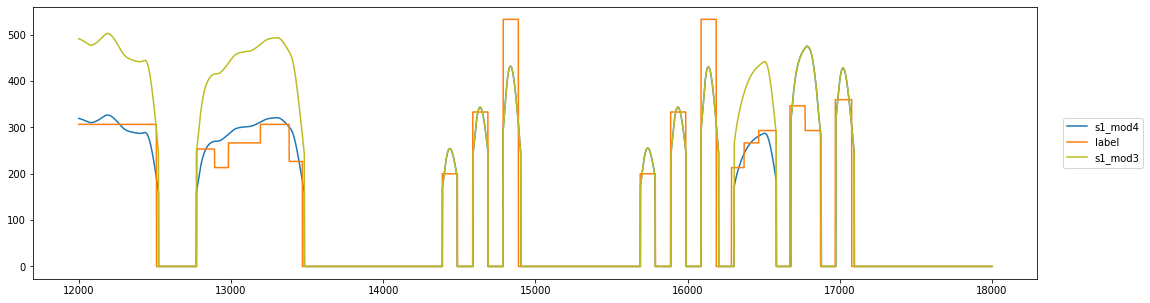

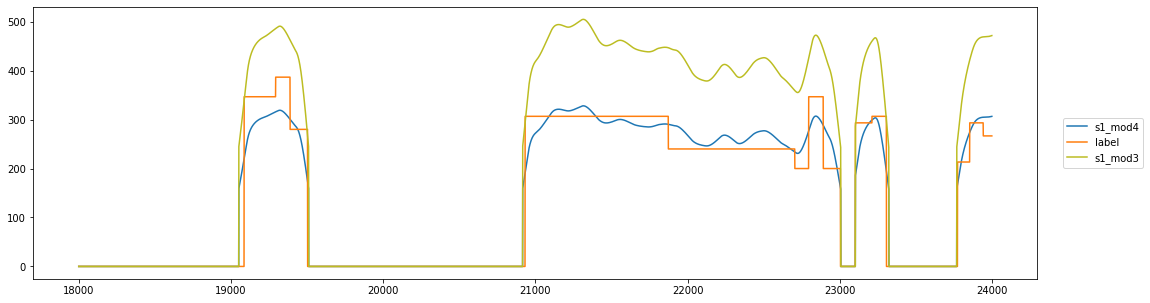

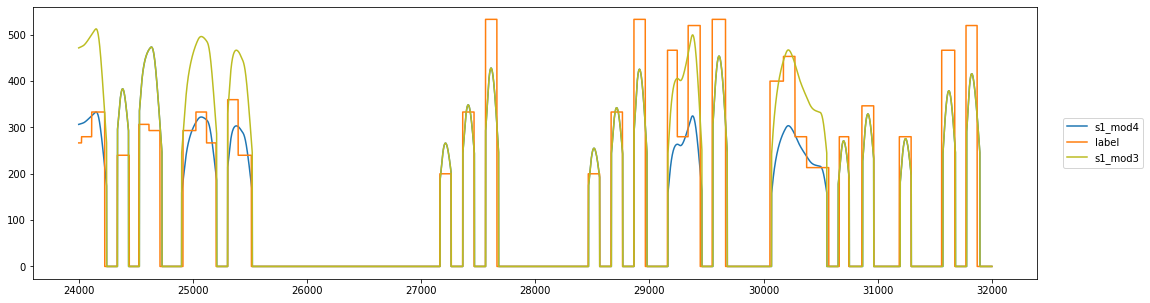

In [28]:
plot_time(train_ds, time=(0, 6000), columns=['s1_mod4','label', 's1_mod3', ])
plot_time(train_ds, time=(6000, 12000), columns=['s1_mod4','label', 's1_mod3', ])
plot_time(train_ds, time=(12000, 18000), columns=['s1_mod4','label', 's1_mod3', ])
plot_time(train_ds, time=(18000, 24000), columns=['s1_mod4','label', 's1_mod3', ])
plot_time(train_ds, time=(24000, 32000), columns=['s1_mod4','label', 's1_mod3', ])

# label 쉽게보기 (간격, 높이)

In [29]:
label_interval = []
label_interval.append((0,0))
for i in range(len(train_ds)):
  if i<len(train_ds)-1 and train_ds['label'][i] != train_ds['label'][i+1]:
    label_interval.append((i,train_ds['label'][i]))
print(len(label_interval))
print(label_interval)

152
[(0, 0), (99, 0.0), (199, 533.33), (1099, 0.0), (1199, 200.0), (1299, 0.0), (1399, 333.33), (1499, 0.0), (1599, 533.33), (2399, 0.0), (2499, 200.0), (2599, 0.0), (2699, 333.33), (2799, 0.0), (2899, 533.33), (2999, 0.0), (3104, 240.0), (3206, 0.0), (3391, 520.0), (3488, 0.0), (3606, 506.67), (3720, 0.0), (3830, 506.67), (3936, 0.0), (4017, 253.33), (4110, 333.33), (4208, 0.0), (4320, 266.67), (4418, 0.0), (4528, 306.67), (4634, 240.0), (4837, 0.0), (5687, 320.0), (6502, 0.0), (7323, 266.67), (8206, 240.0), (8301, 0.0), (8384, 306.67), (8483, 346.67), (8575, 0.0), (8688, 280.0), (8877, 333.33), (8979, 346.67), (9067, 293.33), (9253, 0.0), (9350, 253.33), (9469, 226.67), (9559, 0.0), (9649, 266.67), (9738, 293.33), (9831, 0.0), (9914, 266.67), (10014, 346.67), (10112, 0.0), (10213, 360.0), (10528, 0.0), (10612, 346.67), (10719, 0.0), (10803, 226.67), (11702, 0.0), (12510, 306.67), (12775, 0.0), (12892, 253.33), (12983, 213.33), (13193, 266.67), (13382, 306.67), (13469, 226.67), (14388

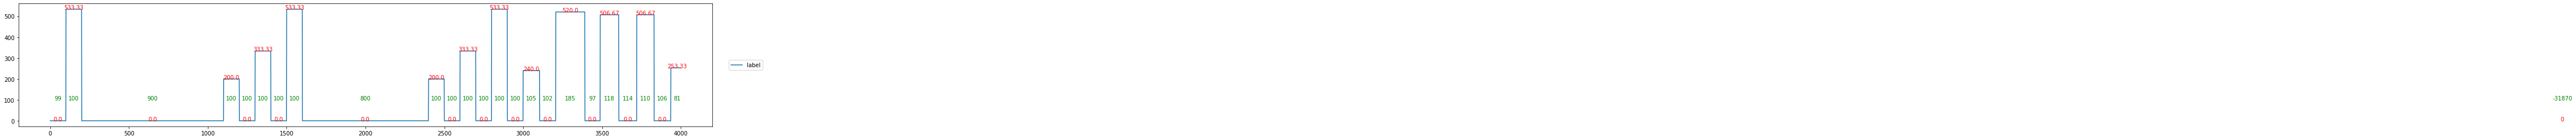

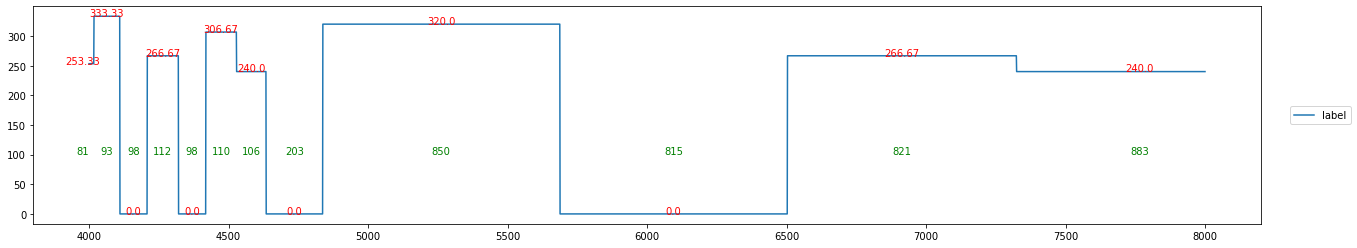

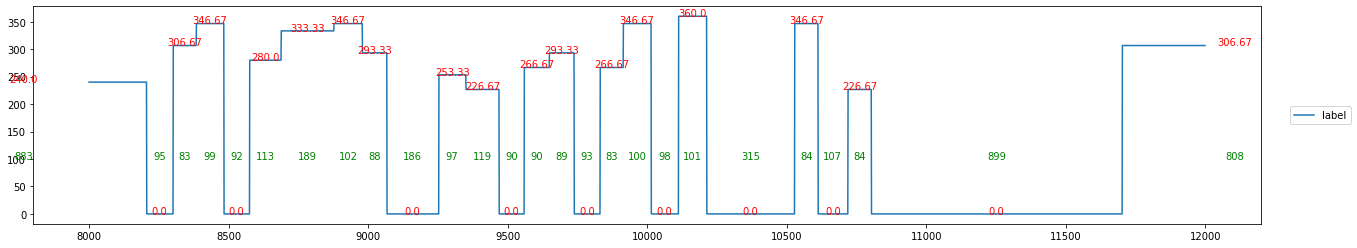

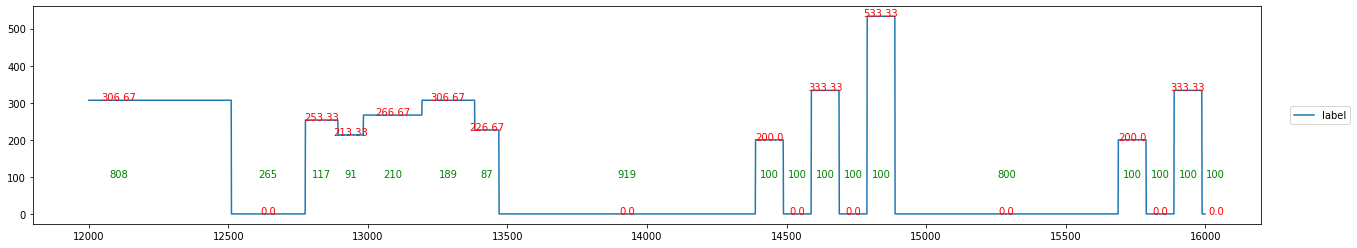

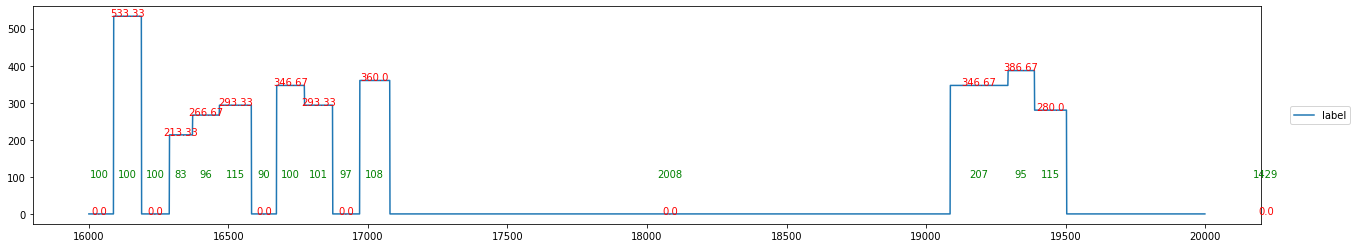

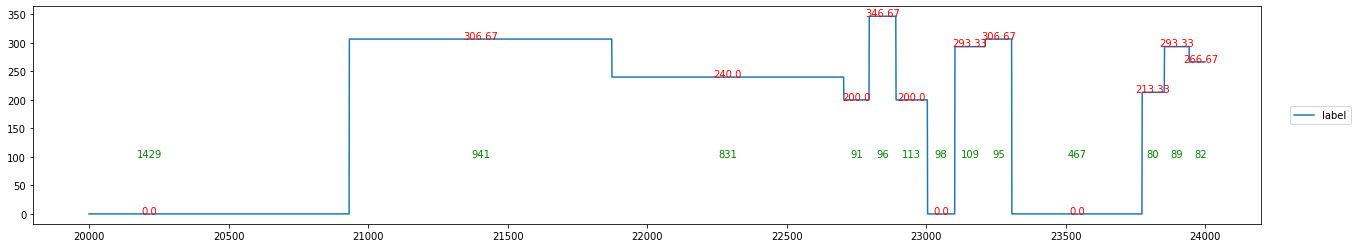

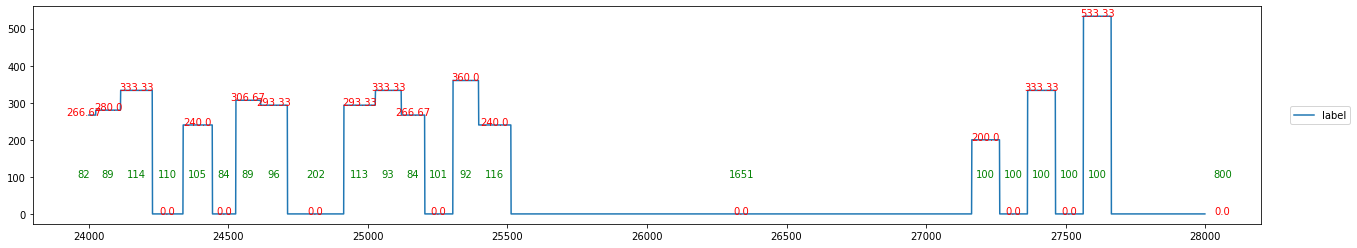

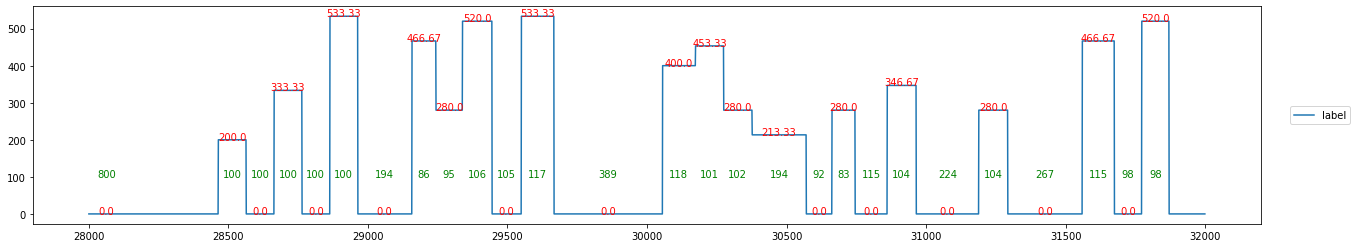

In [30]:
# 그림 작게 나올 경우 마우스 왼쪽 클릭하면 커짐
for i in range(8):
  plot_time(train_ds, time=(4000*i,4000*(i+1)), columns=['label'], text=label_interval)


# Same process on Test set

In [31]:
# down sampling
test_ds = pd.DataFrame()
for i in sensor:
  test_ds[i] = get_average(test[i], average_n)

test_ds['time'] = list(range(len(test_ds)))

In [32]:
# moving_average && minmax_scale
for i in sensor:
  temp = test_ds[i].rolling(window=moving_average).mean()
  test_ds[i] = minmax_scale(temp)

In [33]:
# time shift
test_ds['s1'] = test_ds['s1'].shift(time_gap)

In [34]:
# block 구간 맞추기
cut_off = 260
test_ds['s1_mod'] = [i if i>=cut_off else 0 for i in test_ds['s1'] ]

In [35]:
start_block_test ,end_block_test = find_block('s1_mod', DATA = test_ds)
len(start_block_test) # block의 개수

17

In [36]:
test_ds['s1_mod2'] = test_ds['s1_mod']
for i in range(len(start_block_test)-1):
  mid = (end_block_test[i] + start_block_test[i+1]) // 2
  for j in range(mid - zero_length_left, mid + zero_length_right+1):
        test_ds.at[j, 's1_mod2'] = 0

start_block_test ,end_block_test = find_block('s1_mod', DATA = test_ds)

for i in range(len(start_block_test)):
  mid = (start_block_test[i] + end_block_test[i]) // 2
  for j in range(mid - nonzero_length_left, mid + nonzero_length_right+1):
    test_ds.at[j, 's1_mod2'] = test_ds.at[j, 's1']

In [37]:
# long block trimming
long_block_trimming('s1_mod3', 's1_mod2', long_block_size, trimming, DATA = test_ds)

# of blocks:  17
start_block:  [83, 490, 701, 971, 1366, 1577, 1933, 2969, 4210, 4922, 5269, 6466, 6667, 6864, 7766, 7967, 8164]
end_block  [325, 604, 816, 1268, 1483, 1750, 2058, 3901, 4306, 5032, 5540, 6562, 6763, 6976, 7862, 8063, 8277]
block_length:  [242, 114, 115, 297, 117, 173, 125, 932, 96, 110, 271, 96, 96, 112, 96, 96, 113]


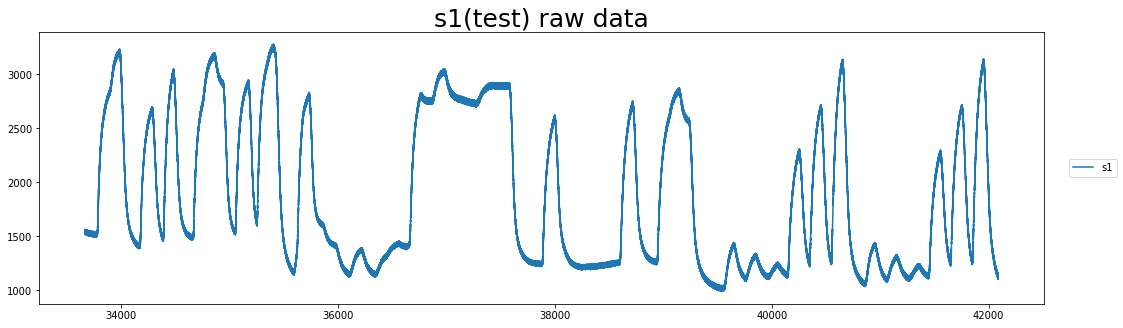

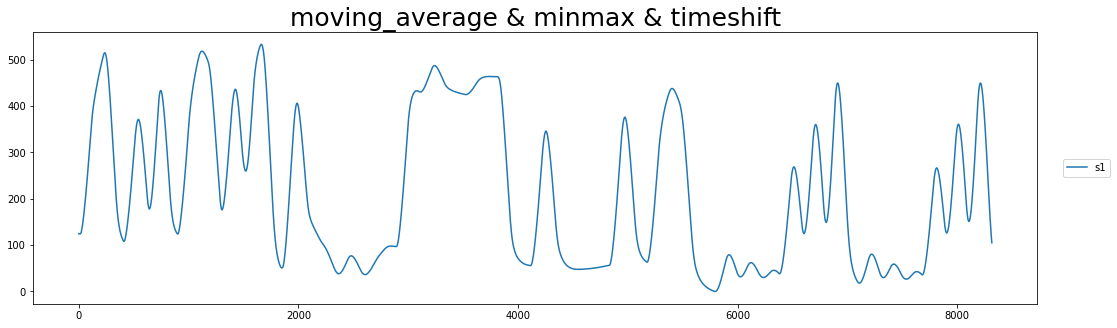

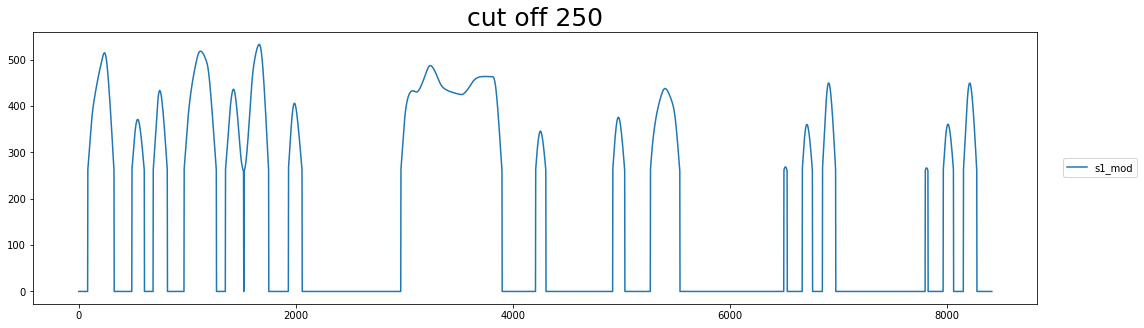

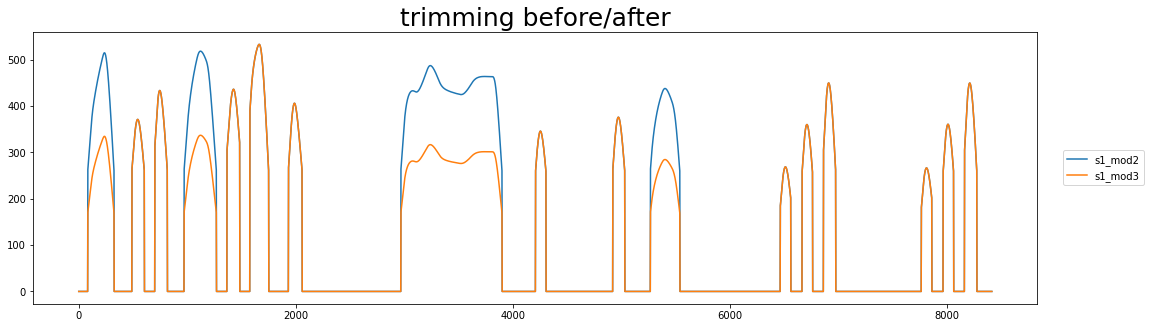

In [38]:
plot_time(test, time=(0,841653), columns=['s1'], title='s1(test) raw data') # raw data
plot_time(test_ds, time=(0, 8500), columns=['s1'], title = 'moving_average & minmax & timeshift')
plot_time(test_ds, time=(0, 8500), columns=['s1_mod'], title='cut off 250') # cut off 250
plot_time(test_ds, time=(0, 8500), columns=['s1_mod2', 's1_mod3'], title='trimming before/after') # 블럭 구간 재조정 & trimming

### train, test ds column 이름 맞춰주기

In [39]:
test_ds['s1_mod4'] = test_ds['s1_mod3']
test_ds['s1_mod3'] = test_ds['s1_mod2']

### sliding window

In [40]:
# Sliding Window by adding features
WINDOW_SIZE = 20

def add_window_features(df, n_post):
    for col in ['time', 's1_mod4']:
        for i in range(1, n_post+1):
            new_col = 'w_{0}({1})'.format(col, i)
            df[new_col] = df[col].copy()
    
    for col in ['time', 's1_mod4']:
        for i in range(1, n_post+1):
            new_col = 'w_{0}({1})'.format(col, i)
            df[new_col] = df[new_col].shift(-i)
            df[new_col] -= df[col]
            
    df = df.fillna(0)
    return df

train = add_window_features(train_ds, n_post=WINDOW_SIZE)
test = add_window_features(test_ds, n_post=WINDOW_SIZE)

In [41]:
test.drop(['s1', 's2', 's3', 's4', 's5', 's6','s7', 's8', 's9','s10', 's11', 's12', 's13','s14', 's15', 's16', 's1_mod', 's1_mod2', 's1_mod3', 'time'], axis=1, inplace=True)

In [42]:
train.drop(['s1', 's2', 's3', 's4', 's5', 's6','s7', 's8', 's9','s10', 's11', 's12', 's13','s14', 's15', 's16', 's1_mod', 's1_mod2', 's1_mod3', 'time'], axis=1, inplace=True)
train.columns

Index(['label', 's2_mod', 's3_mod', 's4_mod', 's5_mod', 's6_mod', 's7_mod',
       's8_mod', 's9_mod', 's10_mod', 's11_mod', 's12_mod', 's13_mod',
       's14_mod', 's15_mod', 's16_mod', 's1_mod4', 'w_time(1)', 'w_time(2)',
       'w_time(3)', 'w_time(4)', 'w_time(5)', 'w_time(6)', 'w_time(7)',
       'w_time(8)', 'w_time(9)', 'w_time(10)', 'w_time(11)', 'w_time(12)',
       'w_time(13)', 'w_time(14)', 'w_time(15)', 'w_time(16)', 'w_time(17)',
       'w_time(18)', 'w_time(19)', 'w_time(20)', 'w_s1_mod4(1)',
       'w_s1_mod4(2)', 'w_s1_mod4(3)', 'w_s1_mod4(4)', 'w_s1_mod4(5)',
       'w_s1_mod4(6)', 'w_s1_mod4(7)', 'w_s1_mod4(8)', 'w_s1_mod4(9)',
       'w_s1_mod4(10)', 'w_s1_mod4(11)', 'w_s1_mod4(12)', 'w_s1_mod4(13)',
       'w_s1_mod4(14)', 'w_s1_mod4(15)', 'w_s1_mod4(16)', 'w_s1_mod4(17)',
       'w_s1_mod4(18)', 'w_s1_mod4(19)', 'w_s1_mod4(20)'],
      dtype='object')

In [43]:
train.drop(['s2_mod', 's3_mod', 's4_mod', 's5_mod', 's6_mod','s7_mod', 's8_mod', 's9_mod','s10_mod', 's11_mod', 's12_mod', 's13_mod','s14_mod', 's15_mod', 's16_mod'], axis=1, inplace=True)

In [49]:
train.columns

Index(['label', 's1_mod4', 'w_time(1)', 'w_time(2)', 'w_time(3)', 'w_time(4)',
       'w_time(5)', 'w_time(6)', 'w_time(7)', 'w_time(8)', 'w_time(9)',
       'w_time(10)', 'w_time(11)', 'w_time(12)', 'w_time(13)', 'w_time(14)',
       'w_time(15)', 'w_time(16)', 'w_time(17)', 'w_time(18)', 'w_time(19)',
       'w_time(20)', 'w_s1_mod4(1)', 'w_s1_mod4(2)', 'w_s1_mod4(3)',
       'w_s1_mod4(4)', 'w_s1_mod4(5)', 'w_s1_mod4(6)', 'w_s1_mod4(7)',
       'w_s1_mod4(8)', 'w_s1_mod4(9)', 'w_s1_mod4(10)', 'w_s1_mod4(11)',
       'w_s1_mod4(12)', 'w_s1_mod4(13)', 'w_s1_mod4(14)', 'w_s1_mod4(15)',
       'w_s1_mod4(16)', 'w_s1_mod4(17)', 'w_s1_mod4(18)', 'w_s1_mod4(19)',
       'w_s1_mod4(20)'],
      dtype='object')

### 이제 train, test 가 학습에 사용될 df

# MODEL: REGRESSION

## STACKING ENSEMBLE

In [56]:
from sklearn.model_selection import train_test_split


classes = np.unique(train_ds['label']).tolist()


X_features = train.drop(['label'], axis=1, inplace=False)
y_target = train['label']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, shuffle = False)

from sklearn.metrics import mean_squared_error
def get_rmse(model):
    pred = model.predict(X_test)
    print(pred)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, ' 로그 변환된 RMSE:', np.round(rmse,3))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score() 수행. 모델별 CV RMSE 값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target, scoring = "neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('\n{0} CV 평균 RMSE 값: {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))


# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE 값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)

from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse,4), grid_model.best_params_))
    
ridge_params = {'alpha': [1, 5, 10, 20, 30]}
lasso_params = {'alpha': [0.01, 0.05, 400,450,500]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha = 1)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.05)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb_reg, xgb_params)

from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators = 1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
print_best_params(lgbm_reg, lgbm_params)

def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key,rmse))

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=30)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.05)
lasso_reg.fit(X_train, y_train)

lr_pred= lr_reg.predict(X_test)
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

pred = 0.4*ridge_pred + 0.6*lasso_pred

preds = {'최종혼합': pred, 'Linear': lr_pred, 'Ridge': ridge_pred, 'Lasso': lasso_pred}

get_rmse_pred(preds)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.6 * xgb_pred + 0.4* lgbm_pred
preds = {'최종혼합': pred, 'XGB': xgb_pred, 'LGBM': lgbm_pred}

get_rmse_pred(preds)

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds 값으로 KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=None)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작 ')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트:', folder_counter, ' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

# get_stacking_base_datasets()는 넘파이 ndarray를 인자로 사용하므로 df 를 numpy로 변환

X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반 모델이 생성한 학습용, 테스트용 데이터 반환
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 스태킹 형태로 결합
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 ?? 모델을 적용
meta_model_lgbm = Lasso(alpha=0.05)



# 개별 모델 예측값을 기반으로 새롭게 만들어진 학습/테스트 데이터로 메타 모델 예측 및 RSME 측정
meta_model_lgbm.fit(Stack_final_X_train, y_train)
final = meta_model_lgbm.predict(Stack_final_X_test)

mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RSME 값은: ', rmse)

# Regression 결과값들 -> label 값으로 수정
for i in range(len(final)):
    value = final[i]
    min_dif = 1000
    min_class = -1
    for label in classes:
        if abs(value - label) < min_dif:
            min_dif = abs(value - label)
            min_class = label
    final[i] = min_class

mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RSME 값은: ', rmse)

# 실제 test data 에 대해 예측
X_test_data = test.copy()
lasso_predict = lasso_reg.predict(X_test_data.values).reshape(-1,1)
ridge_predict = ridge_reg.predict(X_test_data.values).reshape(-1,1)
xgb_predict = xgb_reg.predict(X_test_data.values).reshape(-1,1)
lgbm_predict = lgbm_reg.predict(X_test_data.values).reshape(-1,1)
final_X_test = np.concatenate((ridge_predict, lasso_predict, xgb_predict, lgbm_predict), axis=1)
stacking_reg_predict = meta_model_lgbm.predict(final_X_test)

[0.02982194 0.02982194 0.02982194 ... 0.02982194 0.02982194 0.02982194]
LinearRegression  로그 변환된 RMSE: 83.984
[0.02982214 0.02982214 0.02982214 ... 0.02982214 0.02982214 0.02982214]
Ridge  로그 변환된 RMSE: 83.984
[0.03020157 0.03020157 0.03020157 ... 0.03020157 0.03020157 0.03020157]
Lasso  로그 변환된 RMSE: 83.996

LinearRegression CV RMSE 값 리스트: [80.792 53.62  49.826 42.427 83.99 ]

LinearRegression CV 평균 RMSE 값: 62.131

Ridge CV RMSE 값 리스트: [80.792 53.62  49.826 42.427 83.99 ]

Ridge CV 평균 RMSE 값: 62.131

Lasso CV RMSE 값 리스트: [80.779 53.614 49.831 42.424 84.002]

Lasso CV 평균 RMSE 값: 62.13
Ridge 5 CV 시 최적 평균 RMSE 값:64.4041, 최적 alpha:{'alpha': 30}
Lasso 5 CV 시 최적 평균 RMSE 값:64.404, 최적 alpha:{'alpha': 0.05}
[0.02982194 0.02982194 0.02982194 ... 0.02982194 0.02982194 0.02982194]
LinearRegression  로그 변환된 RMSE: 83.984
[0.02982214 0.02982214 0.02982214 ... 0.02982214 0.02982214 0.02982214]
Ridge  로그 변환된 RMSE: 83.984
[0.02985501 0.02985501 0.02985501 ... 0.02985501 0.02985501 0.02985501]
Lasso  로그 변환

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will gen

XGBRegressor 5 CV 시 최적 평균 RMSE 값:62.3274, 최적 alpha:{'n_estimators': 1000}
LGBMRegressor 5 CV 시 최적 평균 RMSE 값:63.7169, 최적 alpha:{'n_estimators': 1000}
최종혼합 모델의 RMSE: 83.9840363971103
Linear 모델의 RMSE: 83.98366525678524
Ridge 모델의 RMSE: 83.98366777536313
Lasso 모델의 RMSE: 83.98428290511603


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


최종혼합 모델의 RMSE: 76.95686215540813
XGB 모델의 RMSE: 76.72951639605792
LGBM 모델의 RMSE: 79.70402996476611
Ridge model 시작 
	 폴드 세트: 0  시작 
	 폴드 세트: 1  시작 
	 폴드 세트: 2  시작 
	 폴드 세트: 3  시작 
	 폴드 세트: 4  시작 
Lasso model 시작 
	 폴드 세트: 0  시작 
	 폴드 세트: 1  시작 
	 폴드 세트: 2  시작 
	 폴드 세트: 3  시작 
	 폴드 세트: 4  시작 
XGBRegressor model 시작 
	 폴드 세트: 0  시작 


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


	 폴드 세트: 1  시작 
	 폴드 세트: 2  시작 
	 폴드 세트: 3  시작 
	 폴드 세트: 4  시작 
LGBMRegressor model 시작 
	 폴드 세트: 0  시작 
	 폴드 세트: 1  시작 
	 폴드 세트: 2  시작 
	 폴드 세트: 3  시작 
	 폴드 세트: 4  시작 
스태킹 회귀 모델의 최종 RSME 값은:  77.49651835872638
스태킹 회귀 모델의 최종 RSME 값은:  79.71279247439482


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [57]:
stacking_reg_submission = pd.DataFrame()
stacking_reg_submission['id'] = test_org['id']
label = []
for i in range(len(test_org['id'])):
    label.append(stacking_reg_predict[i//100])

stacking_reg_submission['label'] = label

## LSTM REGRESSION

In [74]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [75]:
from sklearn.model_selection import train_test_split

feature_cols = ['s1_mod4']
label_cols = ['label']

train_feature = train[feature_cols]
train_label = train[label_cols]
train_feature, train_label = make_dataset(train_feature, train_label, 20)

X_train, X_test, y_train, y_test = train_test_split(train_feature, train_label, test_size=0.2, shuffle=False)

In [76]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience= 15)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

model.fit(X_train, y_train, epochs=300, batch_size=20, validation_data=(X_test, y_test), callbacks=[early_stop, checkpoint])

feature_cols = ['s1_mod4']
test_feature = test[feature_cols]
test_feature, train_label = make_dataset(test_feature, train['label'], 20)
lstm_reg_predict = model.predict(test_feature)


for i in range(len(lstm_reg_predict)):
    value = lstm_reg_predict[i]
    min_dif = 1000
    min_class = -1
    for label in classes:
        if abs(value - label) < min_dif:
            min_dif = abs(value - label)
            min_class = label
    lstm_reg_predict[i] = min_class
    
lstm_reg_submission = pd.DataFrame()
lstm_reg_submission['id'] = test_org['id']
label = []
for i in range(len(test_org['id'])):
    if (i//100)-20<0:
        label.append(0)
    else:
        label.append(lstm_reg_predict[i//100-20])

lstm_reg_submission['label'] = label

Epoch 1/300
1346/1346 [==============================] - 13s 9ms/step - loss: 46270.6065 - val_loss: 17204.4199

Epoch 00001: val_loss improved from inf to 17204.41992, saving model to model/tmp_checkpoint.h5
Epoch 2/300
1346/1346 [==============================] - 11s 8ms/step - loss: 6119.7986 - val_loss: 9016.6045

Epoch 00002: val_loss improved from 17204.41992 to 9016.60449, saving model to model/tmp_checkpoint.h5
Epoch 3/300
1346/1346 [==============================] - 12s 9ms/step - loss: 3434.7718 - val_loss: 8914.2520

Epoch 00003: val_loss improved from 9016.60449 to 8914.25195, saving model to model/tmp_checkpoint.h5
Epoch 4/300
1346/1346 [==============================] - 11s 8ms/step - loss: 3565.3551 - val_loss: 8900.4854

Epoch 00004: val_loss improved from 8914.25195 to 8900.48535, saving model to model/tmp_checkpoint.h5
Epoch 5/300
1346/1346 [==============================] - 11s 8ms/step - loss: 3557.4059 - val_loss: 8969.3115

Epoch 00005: val_loss did not improve fr

IndexError: index 8397 is out of bounds for axis 0 with size 8397

# MODEL: CLASSIFICATION

## STACKING

In [86]:
import numpy as np 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

labels = train_ds['label']
classes = np.unique(labels).tolist()

categorized_label = []
for i in range(len(labels)):
    index = classes.index(labels[i])
    categorized_label.append(index)

train['categorized_label'] = categorized_label


X_features = train.drop(['label', 'categorized_label'], axis=1, inplace = False)
y_target = train['categorized_label']
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state =0, shuffle=False)

knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

lr_final = LogisticRegression(C=10, solver='lbfgs', max_iter=10000)

knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
# gbm_pred = gbm_clf.predict(X_test)

print("KNN 정확도: {0:.4f}".format(accuracy_score(y_test, knn_pred)))
print("RF 정확도: {0:.4f}".format(accuracy_score(y_test, rf_pred)))
print("결정트리 정확도: {0:.4f}".format(accuracy_score(y_test, dt_pred)))
print("ada부스트 정확도: {0:.4f}".format(accuracy_score(y_test, ada_pred)))

pred = np.array([knn_pred, rf_pred, dt_pred])
print(pred.shape)

pred = np.transpose(pred)
print(pred.shape)


meta_rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
meta_rf_clf.fit(pred, y_test)
final = meta_rf_clf.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

final_converted = []
for i in range(len(final)):
    final_converted.append(classes[final[i]])
    

knn_pred = knn_clf.predict(test)
rf_pred = rf_clf.predict(test)
dt_pred = dt_clf.predict(test)
ada_pred = ada_clf.predict(test)

pred = np.array([knn_pred, rf_pred, dt_pred])
pred = np.transpose(pred)

stacking_clf_predict = meta_rf_clf.predict(pred)
stacking_clf_converted = []
for i in range(len(stacking_clf_predict)):
    stacking_clf_converted.append(classes[stacking_clf_predict[i]])
    
stacking_clf_submission = pd.DataFrame()
stacking_clf_submission['id'] = test_org['id']
label = []
for i in range(len(test_org['id'])):
    label.append(stacking_clf_converted[i//100])

stacking_clf_submission['label'] = label


KNN 정확도: 0.7655
RF 정확도: 0.7902
결정트리 정확도: 0.7700
ada부스트 정확도: 0.7444
(3, 6734)
(6734, 3)
최종 메타 모델의 예측 정확도: 0.9384


In [87]:
len(stacking_clf_predict)

8417

## LGBM CLASSIFIER

In [89]:
from lightgbm import LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state =0)

lgbm_wrapper = LGBMClassifier(n_estimators = 1000)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "logloss", eval_set = evals, verbose = True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]


print("lgbm 정확도: {0:.4f}".format(accuracy_score(y_test, preds)))


from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    print("오차행렬")
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))


lgbm_clf_predict = lgbm_wrapper.predict(test)

lgbm_clf_converted = []
for i in range(len(lgbm_clf_predict)):
    lgbm_clf_converted.append(classes[lgbm_clf_predict[i]])
    
lgbm_clf_submission = pd.DataFrame()
lgbm_clf_submission['id'] = test_org['id']
label = []
for i in range(len(test_org['id'])):
    label.append(lgbm_clf_converted[i//100])

lgbm_clf_submission['label'] = label

[1]	valid_0's multi_logloss: 1.32358
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 1.11176
[3]	valid_0's multi_logloss: 0.970699
[4]	valid_0's multi_logloss: 0.893324
[5]	valid_0's multi_logloss: 0.813643
[6]	valid_0's multi_logloss: 0.760389
[7]	valid_0's multi_logloss: 0.710523
[8]	valid_0's multi_logloss: 0.671404
[9]	valid_0's multi_logloss: 0.643942
[10]	valid_0's multi_logloss: 0.618902
[11]	valid_0's multi_logloss: 0.593854
[12]	valid_0's multi_logloss: 0.573114
[13]	valid_0's multi_logloss: 0.555006
[14]	valid_0's multi_logloss: 0.538682
[15]	valid_0's multi_logloss: 0.524595
[16]	valid_0's multi_logloss: 0.511785
[17]	valid_0's multi_logloss: 0.50047
[18]	valid_0's multi_logloss: 0.492672
[19]	valid_0's multi_logloss: 0.482446
[20]	valid_0's multi_logloss: 0.473905
[21]	valid_0's multi_logloss: 0.466538
[22]	valid_0's multi_logloss: 0.462177
[23]	valid_0's multi_logloss: 0.454665
[24]	valid_0's multi_logloss: 0.449479
[25]	valid_0's

# COMPARE RESULTS

In [91]:
results = pd.DataFrame()
results['id'] = test_org['id']
results['stacking_reg'] = stacking_reg_submission['label']
results['lstm_reg'] = lstm_reg_submission['label']
results['stacking_clf'] = stacking_clf_submission['label']
results['lgbm_clf'] = lgbm_clf_submission['label']


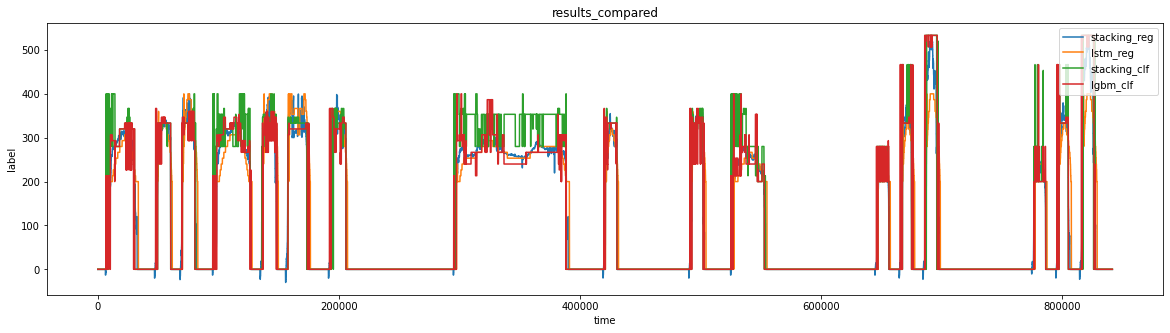

In [103]:
plt.rcParams["figure.figsize"] = (20,5)

plt.plot(results['id'],results['stacking_reg'],label='stacking_reg')
plt.plot(results['id'],results['lstm_reg'],label='lstm_reg')
plt.plot(results['id'],results['stacking_clf'],label='stacking_clf')
plt.plot(results['id'],results['lgbm_clf'],label='lgbm_clf')
plt.xlabel('time')
plt.ylabel('label')
plt.title('results_compared')
plt.legend(loc='upper right')
plt.show()

In [93]:
submission = pd.read_csv('../input/for-final-submission-comp2-data/submission 20210505_6.19.07.csv')

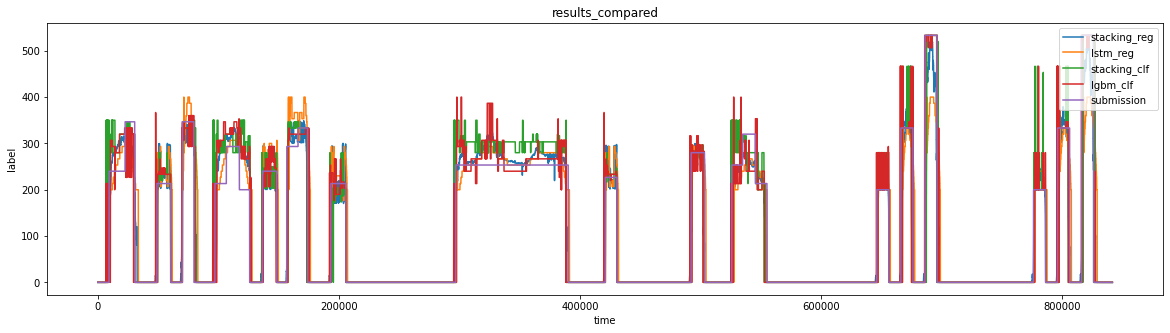

In [134]:
plt.plot(results['id'],results['stacking_reg'],label='stacking_reg')
plt.plot(results['id'],results['lstm_reg'],label='lstm_reg')
plt.plot(results['id'],results['stacking_clf'],label='stacking_clf')
plt.plot(results['id'],results['lgbm_clf'],label='lgbm_clf')
plt.plot(submission['id'], submission['label'], label = 'submission')
plt.xlabel('time')
plt.ylabel('label')
plt.title('results_compared')
plt.legend(loc='upper right')
plt.show()

In [97]:
automl_1_submission = pd.read_csv('../input/automl-submission-results/submission 20210504_8.25.54.csv')
automl_2_submission = pd.read_csv('../input/automl-submission-results/submission 20210505_21.26.39.csv')

In [100]:
for j in range(len(automl_2_submission['id'])):
    val = automl_2_submission.at[j, 'label']
    if val<200:
         automl_2_submission.at[j, 'label']=0

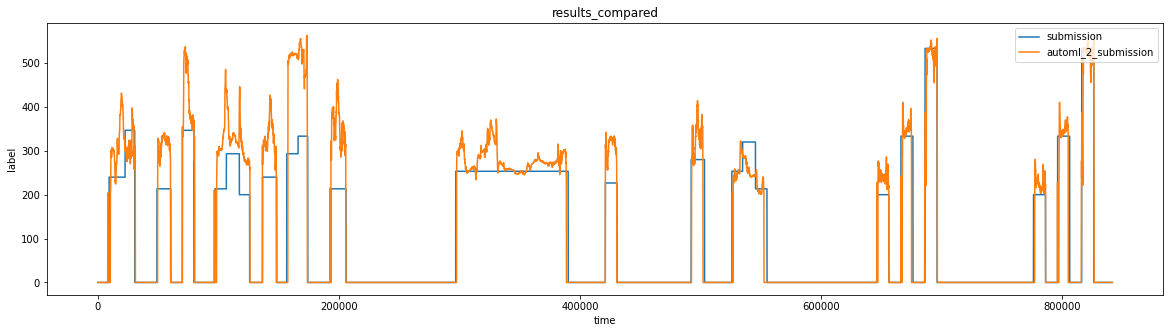

In [101]:
plt.plot(submission['id'], submission['label'], label = 'submission')
plt.plot(automl_2_submission['id'], automl_2_submission['label'], label = 'automl_2_submission')
plt.xlabel('time')
plt.ylabel('label')
plt.title('results_compared')
plt.legend(loc='upper right')
plt.show()

# 번외: H2O AUTOML

In [ ]:
train.drop(['categorized_label'], axis=1, inplace=True)
test.drop(['categorized_label'], axis=1, inplace=True)

In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

print("H2O Complete")

In [ ]:
y = "label"
aml = H2OAutoML(max_runtime_secs = 60*60*6, seed = 1, project_name = "gas_sensor")
aml.train(y = y, training_frame = train)

print("Training Complete")

In [ ]:
aml.leaderboard

In [ ]:
# Predict
test_preds = aml.predict(test)
test_preds= test_preds.as_data_frame()
test_preds = test_preds['predict'].to_numpy()

submission = pd.DataFrame()
submission['id'] = test_org['id']
label = []
for i in range(len(test_org['id'])):
    label.append(test_preds[i//100])

submission['label'] = label

# Make submission
import time
submission.to_csv('submission %s%d%s.csv' %(time.strftime('%Y%m%d_'), (int(time.strftime('%H'))+9) % 24, time.strftime('.%M.%S')), index=False)

print("Submission Complete")

In [ ]:
plt.plot(submission['id'], submission['label'])
plt.ylim(0,600)
plt.show() # 제대로 됐나 확인